## Группа DS03-onl

Студент Парфимович Алексей

## Домашнее задание №8

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
1. Нормализовать данные (Скалировать данные в диаппазоне от -1 до 1).
2. Обработать пропуски и выбросы.
3. Построить матрицу корреляции.
4. Построить гистограммы распределения.
5. Выполнить поиск взаимозависимых данных.
6. Выполнить тест на нормальность.
7. Написать вывод по полученным результатам 
  

### Загрузка набора даных из файла
Загружаем данные из excel файла в pandas dataframe

In [73]:
import pandas as pd

XLS_DATA_PATH = 'Real estate valuation data set.xlsx'

X1='X1 transaction date'
X2='X2 house age'
X3='X3 distance to the nearest MRT station'
X4='X4 number of convenience stores'
X5='X5 latitude'
X6='X6 longitude'
Y ='Y house price of unit area' 

def load_xls_data(data_path):
    return pd.read_excel(data_path)

df = load_xls_data(XLS_DATA_PATH)

df.head()

#df.nunique()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Скалирование данных
Скалирование данных может выполнятся как Нормализация (изменение диапазонов данных без изменения формы распределения) или как Стандартизация (приведение к нормальному распределению)  

Метод Стандартизации требует, чтобы распределение исходных данных могло быть аппроксимировано гауссовым (нормальным) распределением, иначе эффект стандартизации будет плохим.  

Проверим распределение исходных данных с помошью гистограммы

array([[<AxesSubplot:title={'center':'X2 house age'}>,
        <AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:>]], dtype=object)

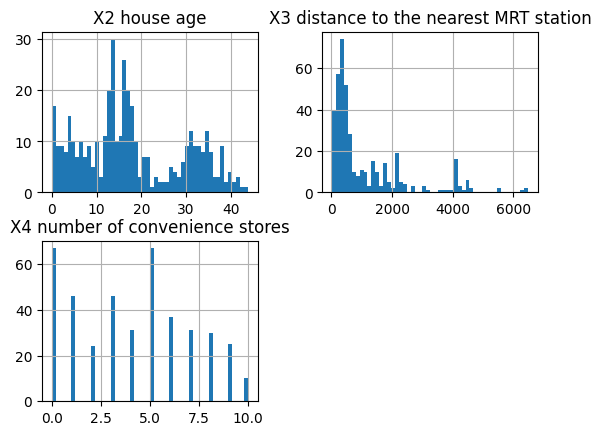

In [3]:
df.hist(column = [X2,X3,X4], bins=50)

In [ ]:
df.hist(column = [X2,X3,X4], bins=50)

Как видно из гистограмм распределения выше - распределение данных не соответсвует нормальному.  
Исходя из этого, правильнее будет применять алгоритмы Нормализации для скалирования данных

#### Нормализация данных с использованием максимального абсолютного масштабирования

In [18]:
abs_max_df = df.copy(deep=True)

for col in abs_max_df[[X2,X3,X4,Y]].columns:
    abs_max_df[col] = abs_max_df[col]/ abs_max_df[col].abs().max()

abs_max_df.head()
#abs_max_df.hist(column = [X2,X3,X4], bins=50)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,0.730594,0.013082,1.0,24.98298,121.54024,0.322553
1,2,2012.916667,0.445205,0.047256,0.9,24.98034,121.53951,0.359149
2,3,2013.583333,0.303653,0.086619,0.5,24.98746,121.54391,0.402553
3,4,2013.500000,0.303653,0.086619,0.5,24.98746,121.54391,0.466383
4,5,2012.833333,0.114155,0.060198,0.5,24.97937,121.54245,0.366809


#### Нормализация данных с использованием MinMax масштабирования

In [11]:
min_max_df = df.copy(deep=True)

for col in min_max_df[[X2,X3,X4,Y]].columns:
    min_max_df[col] = (min_max_df[col] - min_max_df[col].min()) / (min_max_df[col].max() - min_max_df[col].min())

min_max_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,0.730594,0.009513,1.0,24.98298,121.54024,0.275705
1,2,2012.916667,0.445205,0.043809,0.9,24.98034,121.53951,0.314832
2,3,2013.583333,0.303653,0.083315,0.5,24.98746,121.54391,0.361237
3,4,2013.500000,0.303653,0.083315,0.5,24.98746,121.54391,0.429481
4,5,2012.833333,0.114155,0.056799,0.5,24.97937,121.54245,0.323021


#### Нормализация данных с использованием метода Z-оценки (Стандартизация)

In [19]:
z_mean_df = df.copy(deep=True)

for col in z_mean_df[[X2,X3,X4,Y]].columns:
    z_mean_df[col] = (z_mean_df[col] - z_mean_df[col].mean()) / z_mean_df[col].std()

z_mean_df.head()
#z_mean_df.hist(column = [X2,X3,X4], bins=50)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,1.254111,-0.791537,2.004982,24.98298,121.54024,-0.005894
1,2,2012.916667,0.156896,-0.615866,1.665488,24.98034,121.53951,0.310132
2,3,2013.583333,-0.387322,-0.413515,0.307513,24.98746,121.54391,0.684953
3,4,2013.500000,-0.387322,-0.413515,0.307513,24.98746,121.54391,1.236161
4,5,2012.833333,-1.115873,-0.549332,0.307513,24.97937,121.54245,0.376277


#### Нормализация данных с использованием метода Z-оценки, с заменой среднего значения на медиану

In [20]:
z_median_df = df.copy(deep=True)

for col in z_median_df[[X2,X3,X4,Y]].columns:
    z_median_df[col] = (z_median_df[col] - z_median_df[col].median()) / z_median_df[col].std()

z_median_df.head()
#z_median_df.hist(column = [X2,X3,X4], bins=50)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,1.395657,-0.322755,2.036963,24.98298,121.54024,-0.040422
1,2,2012.916667,0.298442,-0.147084,1.697469,24.98034,121.53951,0.275604
2,3,2013.583333,-0.245776,0.055267,0.339494,24.98746,121.54391,0.650425
3,4,2013.500000,-0.245776,0.055267,0.339494,24.98746,121.54391,1.201633
4,5,2012.833333,-0.974327,-0.080550,0.339494,24.97937,121.54245,0.341749


### Очистка данных

#### Обработка пропусков и выбросов данных

1. Построение карты пропущенных значений

C:\Windows\Temp\ipykernel_20564\2846469593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[X1,X2,X3,X4,X5,X6,Y]].replace('', np.nan, inplace=True)


<AxesSubplot:>

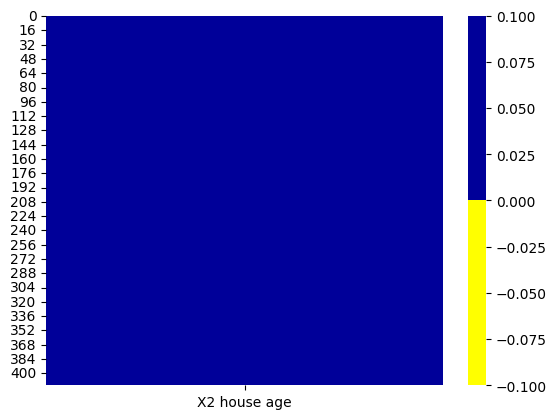

In [80]:
from multiprocessing.sharedctypes import Value
import numpy as np

# Удалить все пробелы из строк
df.replace(r'\s+', '', regex=True, inplace=True)

# Заменить пустые строки на NaN
df[[X1,X2,X3,X4,X5,X6,Y]].replace('', np.nan, inplace=True)


import matplotlib.pyplot as plt
import seaborn as sn

# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#ffff00', '#000099']

sn.heatmap(df[[X2]].isnull(), cmap=sn.color_palette(colours))


2. Составление списка признаков c долями отсутствующих записей в процентах 

In [75]:
import numpy as np

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

No - 0%
X1 transaction date - 0%
X2 house age - 0%
X3 distance to the nearest MRT station - 0%
X4 number of convenience stores - 0%
X5 latitude - 0%
X6 longitude - 0%
Y house price of unit area - 0%


#### Обнаружение выбросов (Нетипичных данных)

1. Анализ описательной статистики набора данных - значений квартиля 75% и максимальных значений признаков

In [38]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


2. Построение коробчатой диаграммы признаков

(принято считать что любые точки данных ниже нижней или выше верхней границ диаграммы рассматриваются как выбросы.)

<AxesSubplot:>

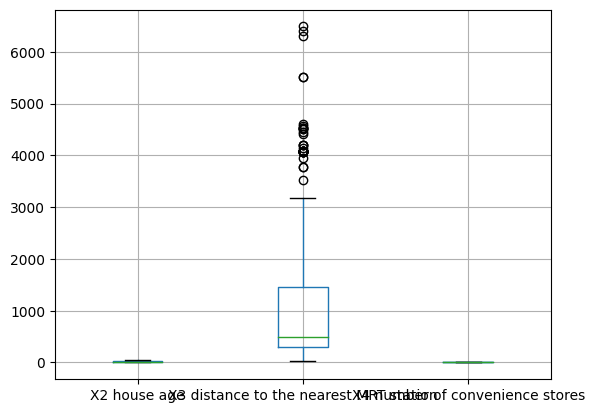

In [23]:
df.boxplot(column=[X2,X3,X4])

### Отбор неинформативных признаков

1. Составим список признаков, у которых более 95% строк содержат одно и то же значение  
(такие признаки отсутсвуют)

In [24]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

### Поиск дубликатов записей

Вычислим дубликаты по набору ключевых признаков.  
Например, неуникальными будем считать записи с одинаковыми параметрами X2, X3, X4 и Y.

In [76]:
df.fillna(-999).groupby([X2, X3, X4, X5, X6])[X1].count().sort_values(ascending=False).head(20)

X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  X5 latitude  X6 longitude
0.0           185.42960                               0                                24.97110     121.53170       5
              292.99780                               6                                24.97744     121.54458       5
1.1           193.58450                               6                                24.96571     121.54089       4
0.0           274.01440                               1                                24.97480     121.53059       3
4.0           2147.37600                              3                                24.96299     121.51284       3
16.2          289.32480                               5                                24.98203     121.54348       3
13.6          492.23130                               5                                24.96515     121.53737       3
16.4          289.32480                               5      

### Построение матрицы корреляции признаков

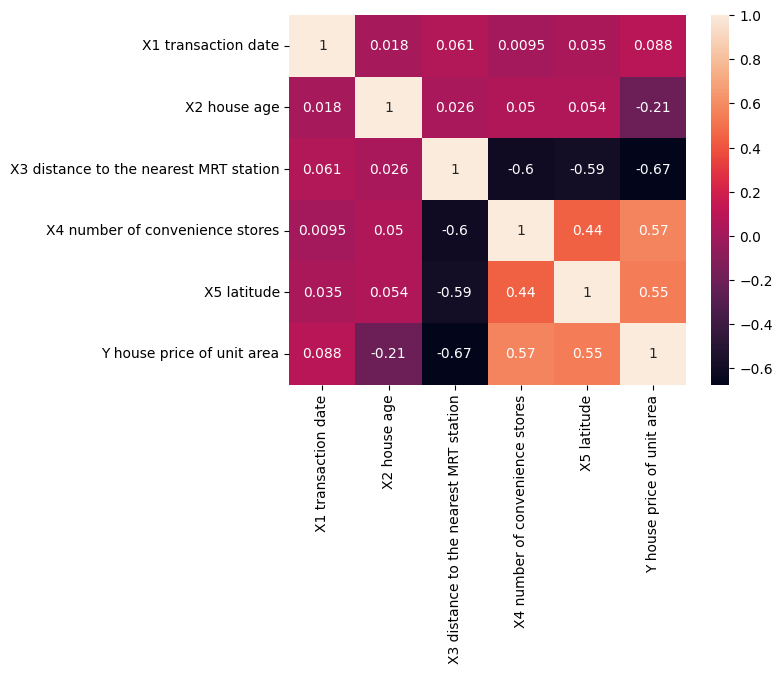

In [27]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(df[[X1,X2,X3,X4,X5,Y]].corr(), annot=True)
plt.show()